In [ ]:
#Import the libraries for the project
import numpy as np
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import lightgbm as lgbm
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

#Load the dataset
df=pd.read_csv(r'E-MTAB-2770-query-results.tpms.tsv',
             sep="\t", comment='#')

df


,Gene ID,Gene Name,"22Rv1, prostate carcinoma","23132/87, gastric adenocarcinoma","253J, bladder carcinoma","253J-BV, bladder carcinoma","42-MG-BA, glioblastoma","5637, bladder carcinoma","59M, high grade ovarian serous adenocarcinoma","639-V, ureter urothelial carcinoma",...,"WSU-DLCL2, diffuse large B-cell lymphoma","YAPC, pancreatic carcinoma","YD-10B, tongue squamous cell carcinoma","YD-15, tongue squamous cell carcinoma","YD-38, head and neck squamous cell carcinoma","YD-8, tongue squamous cell carcinoma","YH-13, glioblastoma","YKG1, glioblastoma","ZR-75-1, invasive ductal carcinoma","ZR-75-30, invasive ductal carcinoma"
0,ENSG00000000003,TSPAN6,7.0,10.0,29.0,33.0,33.0,86.0,23.0,45.0,...,0.7,71.0,15.0,31.0,30.0,60.0,39.0,84.0,14.0,23.0
1,ENSG00000000005,TNMD,NaN,NaN,0.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ENSG00000000419,DPM1,151.0,238.0,94.0,132.0,223.0,222.0,182.0,286.0,...,113.0,239.0,171.0,206.0,208.0,252.0,136.0,235.0,374.0,120.0
3,ENSG00000000457,SCYL3,17.0,27.0,5.0,5.0,5.0,6.0,4.0,5.0,...,11.0,11.0,5.0,5.0,6.0,8.0,10.0,11.0,32.0,21.0
4,ENSG00000000460,C1orf112,24.0,12.0,4.0,9.0,9.0,27.0,9.0,11.0,...,19.0,11.0,7.0,13.0,23.0,8.0,12.0,15.0,20.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,ENSG00000065600,PACC1,21.0,16.0,28.0,30.0,12.0,45.0,30.0,35.0,...,26.0,9.0,12.0,13.0,41.0,20.0,18.0,60.0,42.0,11.0
937,ENSG00000065609,SNAP91,16.0,NaN,NaN,NaN,NaN,0.1,0.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,ENSG00000065613,SLK,72.0,173.0,39.0,58.0,30.0,42.0,34.0,54.0,...,19.0,103.0,49.0,81.0,47.0,70.0,40.0,55.0,87.0,58.0
939,ENSG00000065615,CYB5R4,6.0,24.0,3.0,6.0,8.0,9.0,14.0,10.0,...,27.0,13.0,5.0,6.0,16.0,15.0,7.0,10.0,16.0,4.0


In [ ]:
#Remove normal cell lines
df=df.loc[:,~df.columns.str.contains('normal', case=False)]
df 

,Gene ID,Gene Name,"22Rv1, prostate carcinoma","23132/87, gastric adenocarcinoma","253J, bladder carcinoma","253J-BV, bladder carcinoma","42-MG-BA, glioblastoma","5637, bladder carcinoma","59M, high grade ovarian serous adenocarcinoma","639-V, ureter urothelial carcinoma",...,"WSU-DLCL2, diffuse large B-cell lymphoma","YAPC, pancreatic carcinoma","YD-10B, tongue squamous cell carcinoma","YD-15, tongue squamous cell carcinoma","YD-38, head and neck squamous cell carcinoma","YD-8, tongue squamous cell carcinoma","YH-13, glioblastoma","YKG1, glioblastoma","ZR-75-1, invasive ductal carcinoma","ZR-75-30, invasive ductal carcinoma"
0,ENSG00000000003,TSPAN6,7.0,10.0,29.0,33.0,33.0,86.0,23.0,45.0,...,0.7,71.0,15.0,31.0,30.0,60.0,39.0,84.0,14.0,23.0
1,ENSG00000000005,TNMD,NaN,NaN,0.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ENSG00000000419,DPM1,151.0,238.0,94.0,132.0,223.0,222.0,182.0,286.0,...,113.0,239.0,171.0,206.0,208.0,252.0,136.0,235.0,374.0,120.0
3,ENSG00000000457,SCYL3,17.0,27.0,5.0,5.0,5.0,6.0,4.0,5.0,...,11.0,11.0,5.0,5.0,6.0,8.0,10.0,11.0,32.0,21.0
4,ENSG00000000460,C1orf112,24.0,12.0,4.0,9.0,9.0,27.0,9.0,11.0,...,19.0,11.0,7.0,13.0,23.0,8.0,12.0,15.0,20.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,ENSG00000065600,PACC1,21.0,16.0,28.0,30.0,12.0,45.0,30.0,35.0,...,26.0,9.0,12.0,13.0,41.0,20.0,18.0,60.0,42.0,11.0
937,ENSG00000065609,SNAP91,16.0,NaN,NaN,NaN,NaN,0.1,0.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,ENSG00000065613,SLK,72.0,173.0,39.0,58.0,30.0,42.0,34.0,54.0,...,19.0,103.0,49.0,81.0,47.0,70.0,40.0,55.0,87.0,58.0
939,ENSG00000065615,CYB5R4,6.0,24.0,3.0,6.0,8.0,9.0,14.0,10.0,...,27.0,13.0,5.0,6.0,16.0,15.0,7.0,10.0,16.0,4.0


In [ ]:
#Define the targets for prediction (cancer samples)
target=list(df.columns[2:])

#A function to engineer the labels  list
# The 2 labels of interest are 'leukemia' and 'other cancers'
def eng_labels(x):
   labs=[]
   for s in x:
         if 'leukemia' in s:
             labs.append('leukemia')
         else: 
             labs.append('other cancers')
   return(labs)

#Engineer the labels
labs=eng_labels(target)
labs=['Gene']+labs
labs=pd.Series(labs)

In [ ]:
#Engineer the data
data=df.iloc[:,1:]   
data.columns=labs
data=data.transpose()
data.columns=data.loc['Gene',:]
data=data.iloc[1:,:]
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)
data.head(20)

Gene,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,NDUFB4,SPEN,MYLK,ZC3H15,MAP2K4,PACC1,SNAP91,SLK,CYB5R4,COL17A1
other cancers,7.0,NaN,151.0,17.0,24.0,NaN,0.1,100.0,124.0,95.0,...,156.0,76.0,1.0,139.0,32.0,21.0,16.0,72.0,6.0,0.1
other cancers,10.0,NaN,238.0,27.0,12.0,NaN,0.4,325.0,101.0,48.0,...,101.0,42.0,0.3,179.0,32.0,16.0,NaN,173.0,24.0,0.6
other cancers,29.0,0.1,94.0,5.0,4.0,NaN,0.3,76.0,16.0,17.0,...,141.0,14.0,26.0,68.0,16.0,28.0,NaN,39.0,3.0,0.2
other cancers,33.0,NaN,132.0,5.0,9.0,NaN,0.1,60.0,20.0,35.0,...,155.0,25.0,10.0,107.0,21.0,30.0,NaN,58.0,6.0,1.0
other cancers,33.0,NaN,223.0,5.0,9.0,NaN,0.4,99.0,8.0,42.0,...,97.0,43.0,2.0,176.0,15.0,12.0,NaN,30.0,8.0,0.8
other cancers,86.0,NaN,222.0,6.0,27.0,0.3,2.0,138.0,11.0,43.0,...,168.0,44.0,4.0,132.0,16.0,45.0,0.1,42.0,9.0,105.0
other cancers,23.0,NaN,182.0,4.0,9.0,NaN,9.0,123.0,38.0,47.0,...,74.0,35.0,9.0,150.0,15.0,30.0,0.6,34.0,14.0,0.3
other cancers,45.0,NaN,286.0,5.0,11.0,NaN,15.0,151.0,23.0,75.0,...,109.0,37.0,1.0,154.0,34.0,35.0,NaN,54.0,10.0,0.2
other cancers,85.0,NaN,195.0,4.0,14.0,NaN,0.3,109.0,20.0,51.0,...,157.0,26.0,1.0,91.0,25.0,36.0,0.1,23.0,7.0,0.7
leukemia,0.2,NaN,101.0,11.0,22.0,0.1,0.2,0.4,19.0,102.0,...,152.0,51.0,43.0,150.0,25.0,55.0,NaN,12.0,4.0,0.1


# New Section

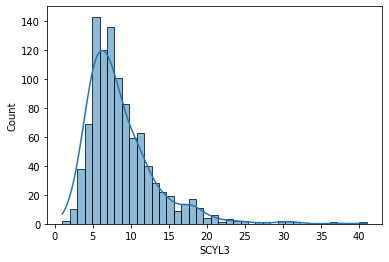

In [ ]:

#Visualize SCYL3 gene expression across the sample
sns.histplot(data['SCYL3'], kde=True) 


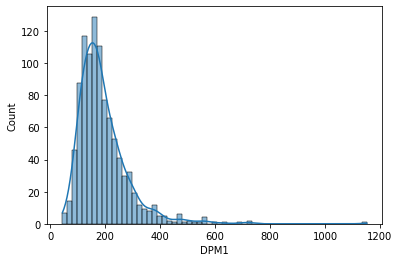

In [ ]:
sns.histplot(data['DPM1'], kde=True) 

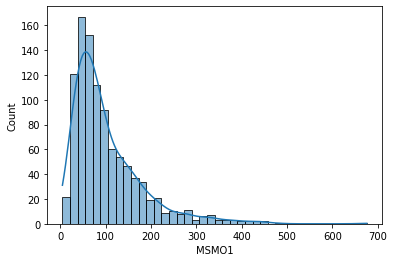

In [ ]:
sns.histplot(data['MSMO1'], kde=True) 

In [ ]:



#Data preprocessing
data_x=data                       
data_x=np.array(data_x)
le = LabelEncoder()
le.fit(data.index)
data_y=le.transform(data.index) 
data_y=pd.Series(data_y)


In [ ]:
#Train/Test split
xtrain, xtest, ytrain, ytest = train_test_split(
 data_x, data_y, test_size=0.33, random_state=87)

#Converting the data to np.arrays
#This is needed to facilitate the training process
xtrain=np.array(xtrain, dtype=np.float32)
ytrain=np.array(ytrain, dtype=np.float32)


xtrain, ytrain=shuffle(xtrain, ytrain)
xtest, ytest=shuffle(xtest, ytest)

In [ ]:
#These are the parameters to use for tuning the training process
p={ 'boosting':'dart', 'learning_rate':0.01, 'objective':'binary', 'max_depth':6
   , 'num_leaves':102, 'min_data_in_leaf':40, 'bagging_fraction':1,'device_type':'cpu',
   'feature_fraction':1, 'verbose':0, 'bagging_freq':7, 'extra_trees':'true','cegb_tradeoff':5,
  'max_bin':100, 'min_data_in_bin':6,'n_estimators':15750}

In [ ]:
#Train the classifier and name is lgbmodel
lgbmodel=LGBMClassifier(**p).fit(xtrain, ytrain)

In [ ]:

#Make predictions and calculate accuracy
predictions = lgbmodel.predict(xtest)
rpreds = [round(i) for i in predictions]
accuracy = accuracy_score(ytest, rpreds)
accuracy

0.9880239520958084

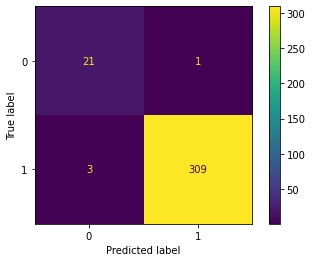

In [ ]:
#Make the confusion matrix
cm = confusion_matrix(ytest, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
#Extract the feature importances
importances=lgbmodel.feature_importances_
importances=pd.Series(importances)
importances.index=data.columns
importances= importances.sort_values(ascending=False)
importances[0:29].to_csv(r'important_genes.csv', sep='\t', header='true')

<BarContainer object of 29 artists>

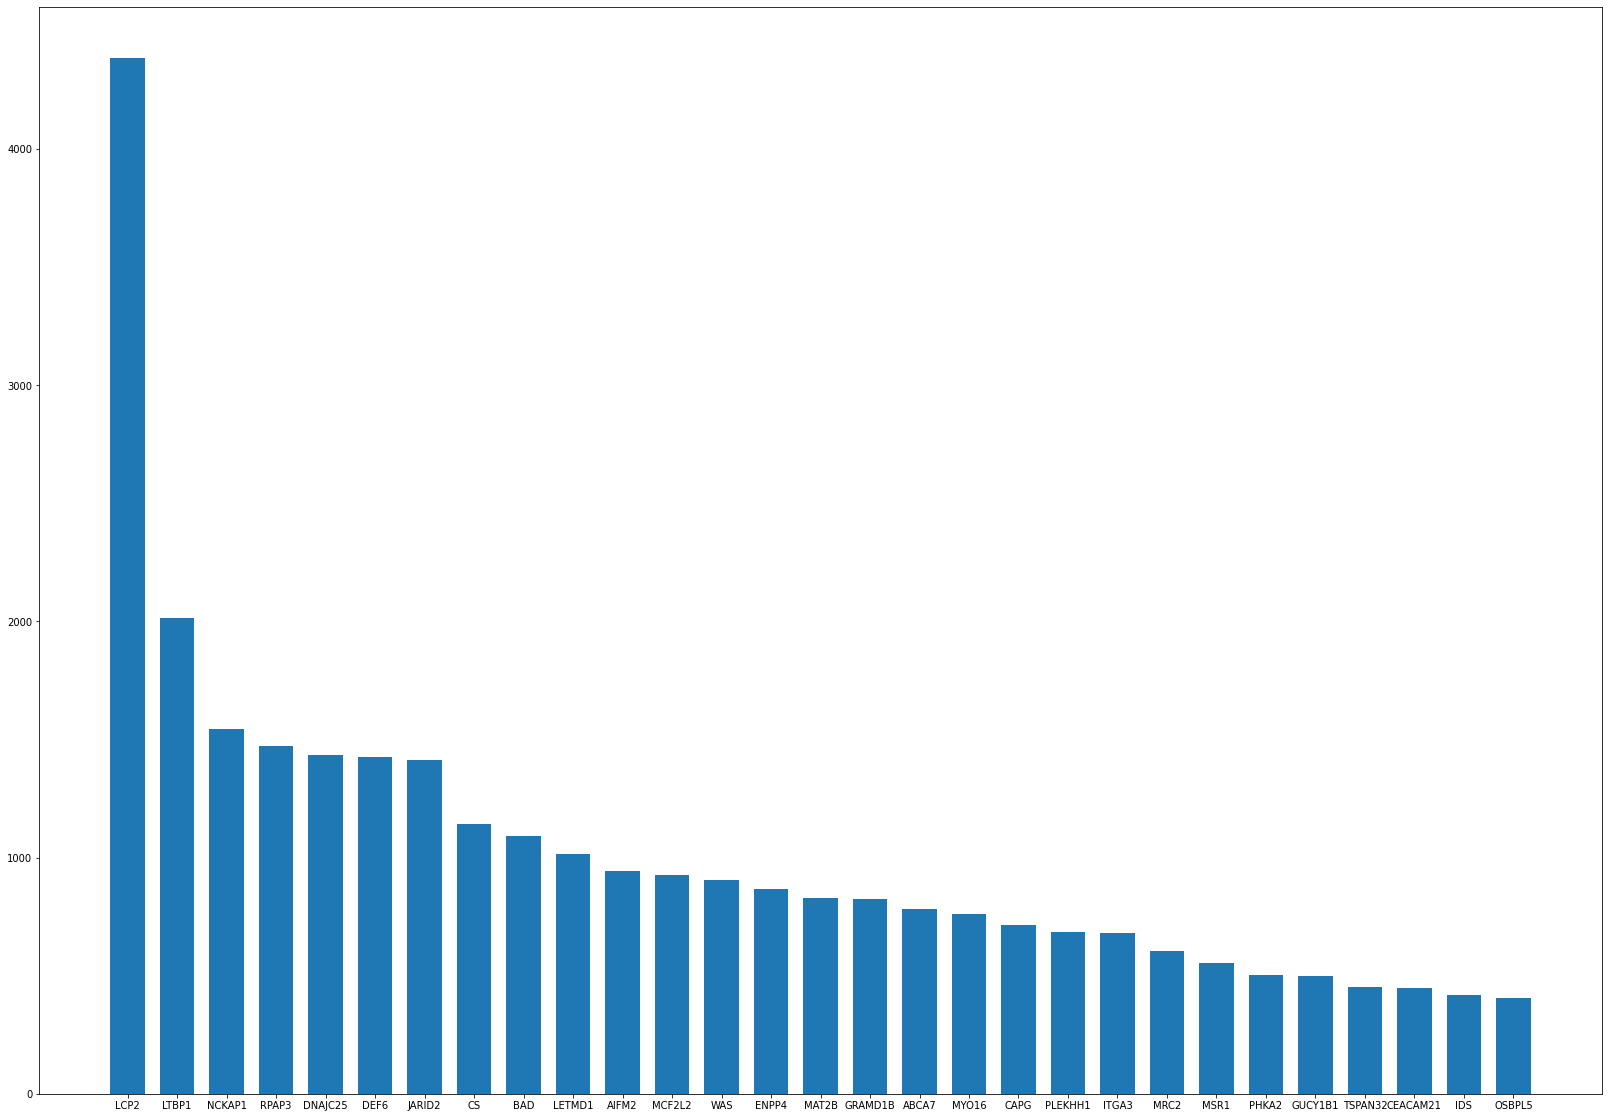

In [ ]:

#Data visualization of the feature importances
plt.figure(figsize=(28,20))
plt.bar(importances[0:29].index, importances[0:29], width=0.7, bottom=None, align='center', data=None)
